In [86]:
%%time
import pandas as pd
from io import StringIO
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



CPU times: total: 0 ns
Wall time: 0 ns


In [87]:
%%time

url = requests.get(' https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv').text
csv_raw = StringIO(url)
df_20 = pd.read_csv(csv_raw, low_memory=False)

CPU times: total: 15.1 s
Wall time: 1min 28s


In [88]:
%%time

url = requests.get('https://umbc.box.com/shared/static/7emabgf9ck2afprmrl459jnk30ewmabj.csv').text
csv_raw = StringIO(url)
df_21 = pd.read_csv(csv_raw, low_memory=False)

CPU times: total: 13.7 s
Wall time: 1min 36s


In [89]:
%%time

url = requests.get('https://umbc.box.com/shared/static/tdkmuj86qm2uxhvjlfkav2i3pnx9fkoa.csv').text
csv_raw = StringIO(url)
df_22 = pd.read_csv(csv_raw, low_memory=False)

CPU times: total: 8.39 s
Wall time: 1min 20s


In [90]:
%%time

url = requests.get('https://umbc.box.com/shared/static/au8h309qptksq5wlem6g5onn5v13fsrc.csv').text
csv_raw = StringIO(url)
df_23 = pd.read_csv(csv_raw, low_memory=False)

CPU times: total: 13.3 s
Wall time: 1min 15s


In [91]:
df = pd.concat([df_20, df_21,df_22,df_23], ignore_index=True)
print(df)

                                 NoticeId  \
0        425a9edc53e84373aeb2826644ac97b6   
1        cbdb7b8ee8de4179b25c36e3b4819a2c   
2        c8609373b0734f1aa5d9dcdf7e26f4c6   
3        c07957305b754b35957e539f98150dcf   
4        50463c77de6c4ebdbd7f1e8be833f4fb   
...                                   ...   
1429965  c6afb31c35a84c5b98398f5f55236b69   
1429966  0acabcdac1b54619a50485040b0f579a   
1429967  ff22effe5a59490c9e587778bc14fda3   
1429968  fdf1333cfa5643c28096a38732be727e   
1429969  73c1c6bc72f04a2685535e58753cf496   

                                                     Title              Sol#  \
0                             66--Airfield Friction Tester  W50S9C-20-Q-0003   
1                           65--COVID 19 cleaning supplies     1018031080_01   
2                                          58--Voyager DSV     1019022491_01   
3        Contract Opportunity Lease of Office Space wit...  20-REG11_8VA2699   
4                          6540-- VISN 5 Eyeglass Contract 

In [92]:
df.nunique()

NoticeId                    1429970
Title                        524372
Sol#                         808312
Department/Ind.Agency            86
CGAC                             79
Sub-Tier                        226
FPDS Code                       234
Office                         3475
AAC Code                       3485
PostedDate                  1419380
Type                             13
BaseType                         13
ArchiveType                       5
ArchiveDate                    2283
SetASideCode                     20
SetASide                         20
ResponseDeadLine              99005
NaicsCode                      2953
ClassificationCode             2519
PopStreetAddress              36362
PopCity                       11625
PopState                        765
PopZip                        15077
PopCountry                      208
Active                            1
AwardNumber                  271763
AwardDate                      2619
Award$                      

In [93]:
df.isnull().sum()

NoticeId                          0
Title                             3
Sol#                          12409
Department/Ind.Agency         14389
CGAC                          14389
Sub-Tier                      15829
FPDS Code                     14494
Office                        14444
AAC Code                      23911
PostedDate                        0
Type                              0
BaseType                          1
ArchiveType                       0
ArchiveDate                   72535
SetASideCode                 894455
SetASide                     894455
ResponseDeadLine             322242
NaicsCode                     75298
ClassificationCode            45535
PopStreetAddress            1325106
PopCity                      910277
PopState                     911157
PopZip                       931840
PopCountry                   794497
Active                            0
AwardNumber                 1135286
AwardDate                   1136326
Award$                      

In [94]:
%%time
#dropping columns
new_df = df.drop(['SetASideCode', 'SetASide', 'SecondaryContactTitle', 'SecondaryContactFullname', 'Description','PrimaryContactFullname','PrimaryContactEmail','PrimaryContactPhone' ,'PrimaryContactFax',
                   'SecondaryContactEmail', 'SecondaryContactPhone', 'SecondaryContactFax', 'AdditionalInfoLink', 'Link','PrimaryContactTitle'],axis=1)

CPU times: total: 766 ms
Wall time: 2.94 s


In [95]:
new_df.shape

(1429970, 32)

In [96]:
%%time
def date_conversion(date):
    date = pd.to_datetime(date, errors='coerce')
    date = date.where(date.between('1678-01-01', '2262-04-11'), np.nan)
    return date.interpolate(method='backfill')

new_df['ArchiveDate'] = date_conversion(new_df['ArchiveDate'])
new_df['AwardDate'] = date_conversion(new_df['AwardDate'])

CPU times: total: 312 ms
Wall time: 683 ms


In [97]:
%%time
new_df['ResponseDeadLine'] = pd.to_datetime(new_df['ResponseDeadLine'], errors='coerce', utc=True)
mask = (new_df['ResponseDeadLine'].dt.year >= 1678) & (new_df['ResponseDeadLine'].dt.year <= 2262)
new_df.loc[~mask, 'ResponseDeadLine'] = pd.NaT
new_df['ResponseDeadLine'] = new_df['ResponseDeadLine'].interpolate(method='backfill')

CPU times: total: 547 ms
Wall time: 1.68 s


In [98]:
%%time
# Convert 'Award$' column to string type if not already
new_df['Award$'] = new_df['Award$'].astype(str)

# Extract numeric portion
new_df['Award$'] = new_df['Award$'].str.extract(r'(\d+\.\d+)').astype(float)


CPU times: total: 906 ms
Wall time: 4.48 s


In [99]:
%%time
# Calculate min
min_value = new_df['Award$'].min()

new_df['Award$'] = new_df['Award$'].fillna(value = min_value)

print(min_value)

0.0
CPU times: total: 15.6 ms
Wall time: 16.8 ms


In [100]:
%%time
#filling null values for the columns
new_df[['Title','Department/Ind.Agency','CGAC','Sol#','FPDS Code','AAC Code','NaicsCode','ClassificationCode','PopStreetAddress','PopCity','PopState','PopZip','PopCountry','Office']] = new_df[['Title','Department/Ind.Agency','CGAC','Sol#','FPDS Code','AAC Code','NaicsCode','ClassificationCode','PopStreetAddress','PopCity','PopState','PopZip','PopCountry','Office']].fillna('OTHER')
new_df[['OrganizationType','State','City','CountryCode','ZipCode','AwardNumber','Awardee']] = new_df[['OrganizationType','State','City','CountryCode','ZipCode','AwardNumber','Awardee']] .fillna('UNKNOWN')



CPU times: total: 1.17 s
Wall time: 2.68 s


# There is an increase in contract awarded by dollar amount overall for all federal agencies.

In [101]:
desired_years = [2020, 2021, 2022, 2023]
filtered_df = new_df[new_df['AwardDate'].dt.year.isin(desired_years)]


In [102]:
filtered_df.shape

(1352729, 32)

In [103]:

filtered_df['Year'] = filtered_df['AwardDate'].dt.year
# Drop rows with missing values in the 'Department/Ind.Agency' column
filtered_df = filtered_df.dropna(subset=['Department/Ind.Agency'])

# Filter rows where the agency name contains 'FEDERAL' and calculate total award amount per year
total_award_per_year = filtered_df[filtered_df['Department/Ind.Agency'].str.contains('FEDERAL')].groupby('Year')['Award$'].sum()

# Set the display format for float values
pd.options.display.float_format = '${:,.2f}'.format

# Display total award amount for federal agencies per year
print("Total Award Amount for Federal Agencies:")
print(total_award_per_year)


C:\Users\bharg\AppData\Local\Temp\ipykernel_18700\2799674919.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total Award Amount for Federal Agencies:
Year
2020   $5,254,814,367.29
2021      $50,699,540.87
2022     $264,958,018.72
2023      $51,685,778.54
Name: Award$, dtype: float64


In [122]:
# Assuming 'filtered_df' is your DataFrame
filtered_df['Year'] = filtered_df['AwardDate'].dt.year
filtered_df = filtered_df.dropna(subset=['Department/Ind.Agency'])

# Filter rows where the agency name contains 'FEDERAL' and calculate total award amount per year
total_award_per_year = filtered_df[filtered_df['Department/Ind.Agency'].str.contains('FEDERAL')].groupby('Year')['Award$'].sum()

# Remove years with zero values
total_award_per_year = total_award_per_year[total_award_per_year != 0].reset_index()

# Plotting the data interactively using Plotly Express
fig = px.bar(total_award_per_year, x='Year', y='Award$', color='Year',
             labels={'Award$': 'Total Award Amount ($)'},
             title='Total Award Amount for Federal Agencies per Year (Non-Zero Values)',
             template='plotly', height=500)

# Show the plot interactively
fig.show()

# 2 There are more dollar contract awarded by Department of Defense in any given year.

In [105]:
import pandas as pd

# Assuming you already have the 'filtered_df' DataFrame with the necessary columns

# Year Extraction
filtered_df['Year'] = filtered_df['AwardDate'].dt.year

# Remove Missing Values
filtered_df = filtered_df.dropna(subset=['Department/Ind.Agency'])

# Identification of Department of Defense
filtered_df['Is_DoD'] = filtered_df['Department/Ind.Agency'].str.contains('DEPT OF DEFENSE', case=False)

# Group by year and department, then calculate total award amount
total_award_per_year_all_departments = filtered_df.groupby(['Year', 'Department/Ind.Agency'])['Award$'].sum()

# Resetting index to make it more readable
total_award_per_year_all_departments = total_award_per_year_all_departments.reset_index()

# Find the top 7 departments per year
top_departments_per_year = total_award_per_year_all_departments.groupby('Year').apply(lambda x: x.nlargest(7, 'Award$'))

# Extract only the necessary columns
result_df = top_departments_per_year[['Year', 'Department/Ind.Agency', 'Award$']]

# Set the display format for float values
pd.options.display.float_format = '${:,.2f}'.format




In [106]:
result_df

Year                          Department/Ind.Agency  \
Year                                                            
2020 13   2020                                DEPT OF DEFENSE   
     79   2020                VETERANS AFFAIRS, DEPARTMENT OF   
     16   2020                          ENERGY, DEPARTMENT OF   
     32   2020       HEALTH AND HUMAN SERVICES, DEPARTMENT OF   
     30   2020                GENERAL SERVICES ADMINISTRATION   
     33   2020               HOMELAND SECURITY, DEPARTMENT OF   
     47   2020  NATIONAL AERONAUTICS AND SPACE ADMINISTRATION   
2021 92   2021                                DEPT OF DEFENSE   
     105  2021                GENERAL SERVICES ADMINISTRATION   
     107  2021       HEALTH AND HUMAN SERVICES, DEPARTMENT OF   
     122  2021  NATIONAL AERONAUTICS AND SPACE ADMINISTRATION   
     152  2021                VETERANS AFFAIRS, DEPARTMENT OF   
     108  2021               HOMELAND SECURITY, DEPARTMENT OF   
     85   2021                        COMMERCE, DEPARTMENT OF   
2022 191  2022                         JUSTICE, DEPARTMENT OF   
     184  2022               HOMELAND SECURITY, DEPARTMENT OF   
     167  2022                                DEPT OF DEFENSE   
     181  2022                GENERAL SERVICES ADMINISTRATION   
     183  2022       HEALTH AND HUMAN SERVICES, DEPARTMENT OF   
     197  2022  NATIONAL AERONAUTICS AND SPACE ADMINISTRATION   
     228  2022                VETERANS AFFAIRS, DEPARTMENT OF   
2023 243  2023                                DEPT OF DEFENSE   
     303  2023                VETERANS AFFAIRS, DEPARTMENT OF   
     261  2023       HEALTH AND HUMAN SERVICES, DEPARTMENT OF   
     273  2023  NATIONAL AERONAUTICS AND SPACE ADMINISTRATION   
     231  2023                     AGRICULTURE, DEPARTMENT OF   
     235  2023                        COMMERCE, DEPARTMENT OF   
     230  2023           AGENCY FOR INTERNATIONAL DEVELOPMENT   

                          Award$  
Year                              
2020 13      $675,268,518,544.54  
     79       $40,316,666,774.32  
     16       $30,736,576,896.53  
     32       $27,551,869,158.25  
     30       $26,171,186,276.37  
     33       $25,327,380,974.10  
     47       $19,811,067,535.38  
2021 92      $673,154,335,579.76  
     105     $165,503,278,847.95  
     107      $84,349,830,972.57  
     122      $16,318,686,519.64  
     152      $14,410,126,874.66  
     108      $14,135,942,942.25  
     85        $8,311,869,088.07  
2022 191 $153,063,903,616,924.75  
     184   $1,039,568,259,022.08  
     167     $649,444,159,503.03  
     181     $167,367,583,930.74  
     183      $53,208,684,126.03  
     197      $40,889,504,425.67  
     228      $28,748,892,512.38  
2023 243     $307,831,678,081.19  
     303     $105,992,006,195.54  
     261      $25,551,240,287.88  
     273      $20,322,792,895.03  
     231      $16,245,322,536.38  
     235      $10,993,214,376.08  
     230       $9,826,119,865.30

# 3 Department of Defense posted the highest number of contracts over the last several years comparing with other departments.

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'new_df' is your DataFrame with the processed data

# Create a 'Year' column
filtered_df['Year'] = filtered_df['AwardDate'].dt.year

# Drop rows with missing values in the 'Department/Ind.Agency' column
filtered_df = filtered_df.dropna(subset=['Department/Ind.Agency'])

# Count the number of contracts awarded by each department for each year
contract_counts_by_department = filtered_df.groupby(['Year', 'Department/Ind.Agency']).size().unstack(fill_value=0)

# Filter out the Department of Defense for all years
non_dod_departments = contract_counts_by_department.columns.difference(['DEPARTMENT OF DEFENSE'], sort=False)
contract_counts_non_dod = contract_counts_by_department[non_dod_departments]

# Get the top 7 departments
top_departments = contract_counts_non_dod.sum().nlargest(7).index
contract_counts_top7 = contract_counts_non_dod[top_departments]


In [111]:
contract_counts_top7

Department/Ind.Agency,DEPT OF DEFENSE,"VETERANS AFFAIRS, DEPARTMENT OF","INTERIOR, DEPARTMENT OF THE","AGRICULTURE, DEPARTMENT OF","HOMELAND SECURITY, DEPARTMENT OF","HEALTH AND HUMAN SERVICES, DEPARTMENT OF","JUSTICE, DEPARTMENT OF"
Year,,,,,,,
2020,267974,31060,15799,8613,10281,8052,8066
2021,222575,32014,15875,9737,10079,7938,9622
2022,227463,33767,15839,11374,10012,10057,9388
2023,181780,28516,17053,11512,8684,9127,6569


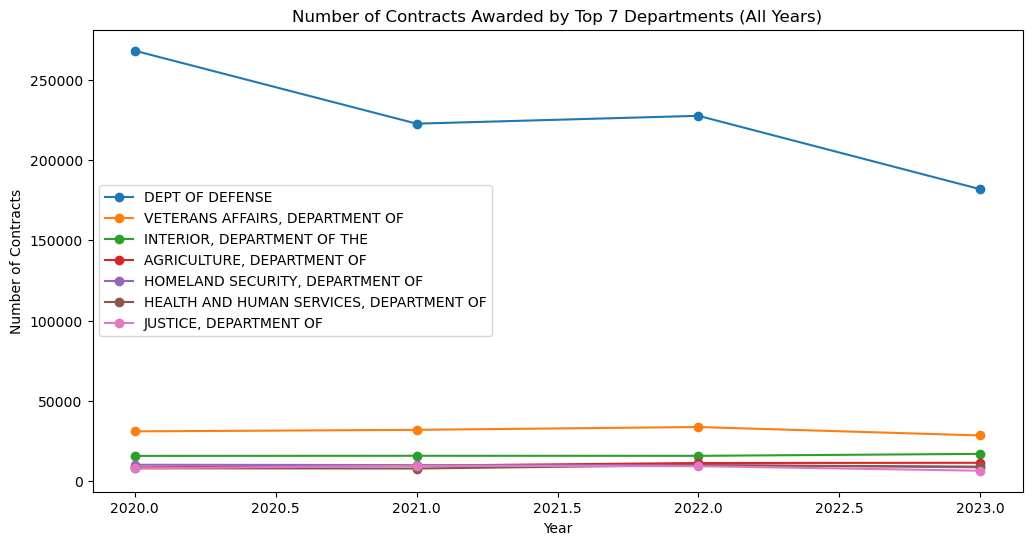

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'new_df' is your DataFrame with the processed data

# Create a 'Year' column
filtered_df['Year'] = filtered_df['AwardDate'].dt.year

# Drop rows with missing values in the 'Department/Ind.Agency' column
filtered_df = filtered_df.dropna(subset=['Department/Ind.Agency'])

# Count the number of contracts awarded by each department for each year
contract_counts_by_department = filtered_df.groupby(['Year', 'Department/Ind.Agency']).size().unstack(fill_value=0)

# Filter out the Department of Defense for all years
non_dod_departments = contract_counts_by_department.columns.difference(['DEPARTMENT OF DEFENSE'], sort=False)
contract_counts_non_dod = contract_counts_by_department[non_dod_departments]

# Sum the contracts across all years for each department
contracts_by_department_sum = contract_counts_non_dod.sum(axis=0)

# Get the top 7 departments
top_departments = contracts_by_department_sum.nlargest(7)

# Plotting the data as a line chart for the top 7 departments
plt.figure(figsize=(12, 6))
for department in top_departments.index:
    plt.plot(contract_counts_non_dod.index, contract_counts_non_dod[department], label=department, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Contracts')
plt.title("Number of Contracts Awarded by Top 7 Departments (All Years)")
plt.legend()
plt.show()


In [109]:
import pandas as pd
import plotly.express as px

# Assuming 'new_df' is your DataFrame with the processed data

# Create a 'Year' column
filtered_df['Year'] = filtered_df['AwardDate'].dt.year

# Drop rows with missing values in the 'Department/Ind.Agency' column
filtered_df = filtered_df.dropna(subset=['Department/Ind.Agency'])

# Count the number of contracts awarded by each department for each year
contract_counts_by_department = filtered_df.groupby(['Year', 'Department/Ind.Agency']).size().unstack(fill_value=0)

# Filter out the Department of Defense for all years
non_dod_departments = contract_counts_by_department.columns.difference(['DEPARTMENT OF DEFENSE'], sort=False)
contract_counts_non_dod = contract_counts_by_department[non_dod_departments]

# Sum the contracts across all years for each department
contracts_by_department_sum = contract_counts_non_dod.sum(axis=0)

# Get the top 7 departments
top_departments = contracts_by_department_sum.nlargest(7)

# Convert the DataFrame to long format for Plotly Express
contract_counts_non_dod = contract_counts_non_dod.reset_index().melt(id_vars='Year', var_name='Department', value_name='Number of Contracts')

# Filter for the top 7 departments
contract_counts_non_dod_top7 = contract_counts_non_dod[contract_counts_non_dod['Department'].isin(top_departments.index)]

# Create an interactive line chart using Plotly Express
fig = px.line(contract_counts_non_dod_top7, x='Year', y='Number of Contracts', color='Department',
              labels={'Number of Contracts': 'Number of Contracts Awarded'},
              title="Number of Contracts Awarded by Top 7 Departments (All Years)")

# Add markers to the lines
fig.update_traces(mode='markers+lines')

# Show the interactive chart
fig.show()


# 4 Department of Defense has the highest dollar amount awarded over the last several years comparing with other departments.

In [112]:
filtered_df['Award$']

0          $75,706.10
1          $11,876.98
2         $110,867.00
3               $0.00
4               $0.00
              ...    
1429965   $673,380.00
1429966   $473,443.80
1429967    $41,429.73
1429968         $0.00
1429969   $253,704.00
Name: Award$, Length: 1352729, dtype: float64

In [113]:
# Drop rows with missing values in 'Award$' or 'Year'
filtered_df = filtered_df.dropna(subset=['Award$', 'Year'])

# Group by 'Year' and 'Department/Ind.Agency' and calculate the sum of 'Award$'
sum_per_year_department = filtered_df.groupby(['Year', 'Department/Ind.Agency'])['Award$'].sum().reset_index()



In [114]:
# Display the result
sum_per_year_department

,Year,Department/Ind.Agency,Award$
0,2020,ADMINISTRATIVE OFFICE OF THE US COURTS,"$447,822.04"
1,2020,AGENCY FOR INTERNATIONAL DEVELOPMENT,"$1,817,789,353.33"
2,2020,"AGRICULTURE, DEPARTMENT OF","$2,705,857,298.04"
3,2020,ARCHITECT OF THE CAPITOL,"$15,365,774.00"
4,2020,CHEMICAL SAFETY AND HAZARD INVESTIGATION BOARD,$0.00
...,...,...,...
299,2023,UNITED STATES HOLOCAUST MEMORIAL MUSEUM,$0.00
300,2023,UNITED STATES INTERNATIONAL DEVELOPMENT FINANC...,"$900,000,000.00"
301,2023,UNITED STATES TRADE AND DEVELOPMENT AGENCY,"$338,320.00"
302,2023,UNITED STATES-CHINA ECONOMIC AND SECURITY REVI...,$0.00


In [115]:
max_indices = sum_per_year_department.groupby('Year')['Award$'].idxmax()

# Get the rows corresponding to the maximum 'Award$' for each year
top_sum_per_year = sum_per_year_department.loc[max_indices]

# Display the result
print(top_sum_per_year)

     Year   Department/Ind.Agency                  Award$
13   2020         DEPT OF DEFENSE     $675,268,518,544.54
92   2021         DEPT OF DEFENSE     $673,154,335,579.76
191  2022  JUSTICE, DEPARTMENT OF $153,063,903,616,924.75
243  2023         DEPT OF DEFENSE     $307,831,678,081.19


In [116]:
fig = px.bar(top_sum_per_year, x='Year', y='Award$', color='Department/Ind.Agency',
             title='Top Sum for Every Year with Respective Department',
             labels={'Award$': 'Total Award Amount', 'Year': 'Year'},
             log_y=True)  # Set log scale for y-axis

# Show the interactive plot
fig.show()

# 5.There is an increase in number of contract posted for Department of Commerce over the last several years


In [117]:
filtered_df

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,AwardDate,Award$,Awardee,OrganizationType,State,City,ZipCode,CountryCode,Year,Is_DoD
0,425a9edc53e84373aeb2826644ac97b6,66--Airfield Friction Tester,W50S9C-20-Q-0003,DEPT OF DEFENSE,$21.00,DEPT OF THE ARMY,2100,W7N4 USPFO ACTIVITY VT ARNG,W912LN,2020-09-30 23:57:23.594-04,...,2020-09-30,"$75,706.10","HALLIDAY TECHNOLOGIES INC [DUNS: 011448375],10...",OFFICE,VT,COLCHESTER,05446-3099,USA,2020,True
1,cbdb7b8ee8de4179b25c36e3b4819a2c,65--COVID 19 cleaning supplies,1018031080_01,"STATE, DEPARTMENT OF",$19.00,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-09-30 23:53:02.228-04,...,2020-09-30,"$11,876.98","KAN HERITAGE INC [DUNS: 079669146],7620 FOLSOM...",OFFICE,DC,WASHINGTON,20520,USA,2020,False
2,c8609373b0734f1aa5d9dcdf7e26f4c6,58--Voyager DSV,1019022491_01,"STATE, DEPARTMENT OF",$19.00,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-09-30 23:48:57.306-04,...,2020-09-30,"$110,867.00",LIGHTFOOT COMMUNICATIONS LLC [DUNS: 943850268]...,OFFICE,DC,WASHINGTON,20520,USA,2020,False
3,c07957305b754b35957e539f98150dcf,Contract Opportunity Lease of Office Space wit...,20-REG11_8VA2699,GENERAL SERVICES ADMINISTRATION,$47.00,PUBLIC BUILDINGS SERVICE,4740,PBS R11 LEASING DIV,47PM99,2020-09-30 23:45:27.966-04,...,2020-09-30,$0.00,UNKNOWN,OFFICE,DC,WASHINGTON,20407,USA,2020,False
4,50463c77de6c4ebdbd7f1e8be833f4fb,6540-- VISN 5 Eyeglass Contract,36C24520R0012,"VETERANS AFFAIRS, DEPARTMENT OF",$36.00,"VETERANS AFFAIRS, DEPARTMENT OF",3600,245-NETWORK CONTRACT OFFICE 5 (36C245),36C245,2020-09-30 23:43:15.213-04,...,2020-09-30,$0.00,null,OFFICE,MD,LINTHICUM,21090,USA,2020,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429965,c6afb31c35a84c5b98398f5f55236b69,7A21--VISN 2 VetLink Queuing Sustainment (VA-2...,36C24223Q0004,"VETERANS AFFAIRS, DEPARTMENT OF",$36.00,"VETERANS AFFAIRS, DEPARTMENT OF",3600,242-NETWORK CONTRACT OFFICE 02 (36C242),36C242,2022-10-01 04:26:04.55-04,...,2022-10-01,"$673,380.00",MINUTEMAN TECHNOLOGY SERVICES LLC MARBLEHEAD 0...,OFFICE,NY,ALBANY,12208,USA,2022,False
1429966,0acabcdac1b54619a50485040b0f579a,J065--Scriptpro Maintenance and Service Repair...,36C24622Q1029,"VETERANS AFFAIRS, DEPARTMENT OF",$36.00,"VETERANS AFFAIRS, DEPARTMENT OF",3600,246-NETWORK CONTRACTING OFFICE 6 (36C246),36C246,2022-10-01 04:10:46.122-04,...,2022-10-01,"$473,443.80",SCRIPTPRO USA INC MISSION 66202,OFFICE,VA,HAMPTON,23667,USA,2022,False
1429967,ff22effe5a59490c9e587778bc14fda3,LEC Services for Sioux Falls CBOC,36C10A23P0004,"VETERANS AFFAIRS, DEPARTMENT OF",$36.00,"VETERANS AFFAIRS, DEPARTMENT OF",3600,TECHNOLOGY ACQUISITION CENTER AUSTIN (36C10A),36C10A,2022-10-01 01:49:36.633-04,...,2022-10-01,"$41,429.73",Fort Randall Telephone Company SD 57380-9373 USA,OFFICE,TX,AUSTIN,78744,USA,2022,False
1429968,fdf1333cfa5643c28096a38732be727e,Zambia Integrated HIV and Health Activity - Am...,72061122R00007,AGENCY FOR INTERNATIONAL DEVELOPMENT,$72.00,AGENCY FOR INTERNATIONAL DEVELOPMENT,7200,USAID/ZAMBIA,720611,2022-10-01 01:41:37.313-04,...,2022-10-01,$0.00,UNKNOWN,OFFICE,UNKNOWN,LUSAKA,UNKNOWN,ZMB,2022,False


In [118]:
filtered_df['PostedDate']

0          2020-09-30 23:57:23.594-04
1          2020-09-30 23:53:02.228-04
2          2020-09-30 23:48:57.306-04
3          2020-09-30 23:45:27.966-04
4          2020-09-30 23:43:15.213-04
                      ...            
1429965     2022-10-01 04:26:04.55-04
1429966    2022-10-01 04:10:46.122-04
1429967    2022-10-01 01:49:36.633-04
1429968    2022-10-01 01:41:37.313-04
1429969    2022-10-01 00:09:14.041-04
Name: PostedDate, Length: 1352729, dtype: object

In [125]:
filtered_df['PostedDate'] = pd.to_datetime(filtered_df['PostedDate'], errors='coerce')

# Drop rows with NaT (optional, if you want to remove rows with invalid timestamps)
filtered_df = filtered_df.dropna(subset=['PostedDate'])

# Extract the year and create a new column 'year_P'
filtered_df['year_P'] = filtered_df['PostedDate'].dt.year

# Filter rows for the Department of Commerce
commerce_df = filtered_df[filtered_df['Department/Ind.Agency'] == 'COMMERCE, DEPARTMENT OF']

# Group by 'year_P' for the Department of Commerce and count the total number of posted dates for each year
commerce_posted_dates_count = commerce_df.groupby('year_P')['PostedDate'].size().reset_index(name='Number_of_Posted_Dates')

# Display the result
print(commerce_posted_dates_count)

   year_P  Number_of_Posted_Dates
0    2019                       4
1    2020                    3605
2    2021                    3673
3    2022                    4128
4    2023                    4179


In [126]:
import plotly.express as px

# Assuming you have already performed the operations mentioned in your code

# Create an interactive bar chart with Plotly Express
fig = px.bar(commerce_posted_dates_count, x='year_P', y='Number_of_Posted_Dates',
             labels={'Number_of_Posted_Dates': 'Number of Posted Dates'},
             title='Number of Posted Dates by Year for the Department of Commerce')

# Customize the layout
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Posted Dates',
                  xaxis=dict(tickmode='linear'))

# Show the interactive plot
fig.show()


# 6 Over the last several years, Census Bureau posted the same number of contract over the years


In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named filtered_df

# Convert 'PostedDate' to datetime
filtered_df['PostedDate'] = pd.to_datetime(filtered_df['PostedDate'], errors='coerce')

# Drop rows with NaT (optional, if you want to remove rows with invalid timestamps)
filtered_df = filtered_df.dropna(subset=['PostedDate'])

# Extract the year and create a new column 'year_P'
filtered_df['year_P'] = filtered_df['PostedDate'].dt.year

# Filter rows for the US Census Bureau (part of the Department of Commerce)
census_df = filtered_df[filtered_df['Sub-Tier'] == 'US CENSUS BUREAU']

# Group by 'year_P' for the US Census Bureau and count the total number of posted dates for each year
census_posted_dates_count = census_df.groupby('year_P')['PostedDate'].size().reset_index(name='Number_of_Posted_Dates')

# Display the result
print(census_posted_dates_count)


   year_P  Number_of_Posted_Dates
0    2020                      50
1    2021                      54
2    2022                      77
3    2023                      53


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named filtered_df

# Convert 'PostedDate' to datetime
filtered_df['PostedDate'] = pd.to_datetime(filtered_df['PostedDate'], errors='coerce')

# Drop rows with NaT (optional, if you want to remove rows with invalid timestamps)
filtered_df = filtered_df.dropna(subset=['PostedDate'])

# Extract the year and create a new column 'year_P'
filtered_df['year_P'] = filtered_df['PostedDate'].dt.year

# Filter rows for the US Census Bureau (part of the Department of Commerce)
census_df = filtered_df[filtered_df['Sub-Tier'] == 'US CENSUS BUREAU']

# Group by 'year_P' for the US Census Bureau and count the total number of posted dates for each year
census_posted_dates_count = census_df.groupby('year_P')['PostedDate'].size().reset_index(name='Number_of_Posted_Dates')

# Create an interactive bar chart with Plotly Express with different colors for each bar
fig = px.bar(census_posted_dates_count, x='year_P', y='Number_of_Posted_Dates',
             color='year_P',  # Set different colors for each bar
             labels={'Number_of_Posted_Dates': 'Number of Posted Dates'},
             title='Number of Posted Dates by Year for the US Census Bureau')

# Customize the layout
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Posted Dates',
                  xaxis=dict(tickmode='linear'))

# Show the interactive plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named filtered_df

# Convert 'PostedDate' to datetime
filtered_df['PostedDate'] = pd.to_datetime(filtered_df['PostedDate'], errors='coerce')

# Drop rows with NaT (optional, if you want to remove rows with invalid timestamps)
filtered_df = filtered_df.dropna(subset=['PostedDate'])

# Extract the year and create a new column 'year_P'
filtered_df['year_P'] = filtered_df['PostedDate'].dt.year

# Filter rows for the Department of Commerce
commerce_df = filtered_df[filtered_df['Department/Ind.Agency'] == 'COMMERCE, DEPARTMENT OF']

# Group by sub-tier and find the largest contract amount for each sub-tier
largest_amounts_df = commerce_df.groupby('Sub-Tier')['Award$'].max().reset_index()



In [ ]:
largest_amounts_df

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named filtered_df

# Convert 'PostedDate' to datetime
filtered_df['PostedDate'] = pd.to_datetime(filtered_df['PostedDate'], errors='coerce')

# Drop rows with NaT (optional, if you want to remove rows with invalid timestamps)
filtered_df = filtered_df.dropna(subset=['PostedDate'])

# Extract the year and create a new column 'year_P'
filtered_df['year_P'] = filtered_df['PostedDate'].dt.year

# Filter rows for the Department of Commerce
commerce_df = filtered_df[filtered_df['Department/Ind.Agency'] == 'COMMERCE, DEPARTMENT OF']

# Group by sub-tier and find the largest contract amount for each sub-tier
largest_amounts_df = commerce_df.groupby('Sub-Tier')['Award$'].max().reset_index()

# Create a bar chart with Plotly Express, using different colors for each bar
fig = px.bar(largest_amounts_df, x='Sub-Tier', y='Award$',
             labels={'Award$': 'Largest Contract Amount ($)'},
             title='Largest Contract Amount for Every Sub-Tier in the Department of Commerce',
             color='Sub-Tier')  # Set color to 'Sub-Tier' for different colors

# Customize the layout
fig.update_layout(xaxis_title='Sub-Tier', yaxis_title='Largest Contract Amount ($)',
                  xaxis=dict(tickmode='linear'))

# Show the interactive plot
fig.show()
